## 3.0 웹 점착성 p. 121

In [14]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

Time 열의 평균 :  0.3566666666666669
0.13952380952380938


C:\Users\User\AppData\Local\Temp\ipykernel_7020\3088505673.py:25: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_7020\3088505673.py:25: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()


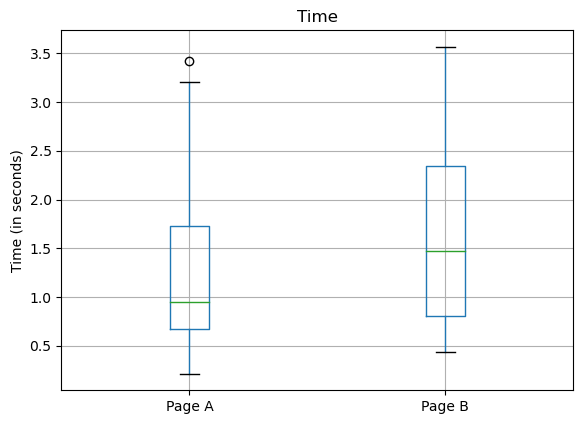

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import random
import numpy as np

session_times = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/web_page_data.csv")

# ggplot을 이용한 상자그림을 통해 세션시간 비교 p. 121
ax = session_times.boxplot(by = 'Page', column = 'Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

# Time 열의 평균구하기 
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print('Time 열의 평균 : ', mean_b - mean_a) 

# 순열검정
# perm_fun : 비복원추출 방식으로 nb개의 표본을 추출후 그룹b에 할당, 나머지는 a할당
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

C:\Users\User\AppData\Local\Temp\ipykernel_7020\3925224477.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_7020\3925224477.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_7020\3925224477.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_7020\3925224477.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_7020\3925224477.py:7: FutureWarning: Pass

-0.034190476190476105


C:\Users\User\AppData\Local\Temp\ipykernel_7020\3925224477.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_7020\3925224477.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_7020\3925224477.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_7020\3925224477.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_7020\3925224477.py:7: FutureWarning: Pass

0.116

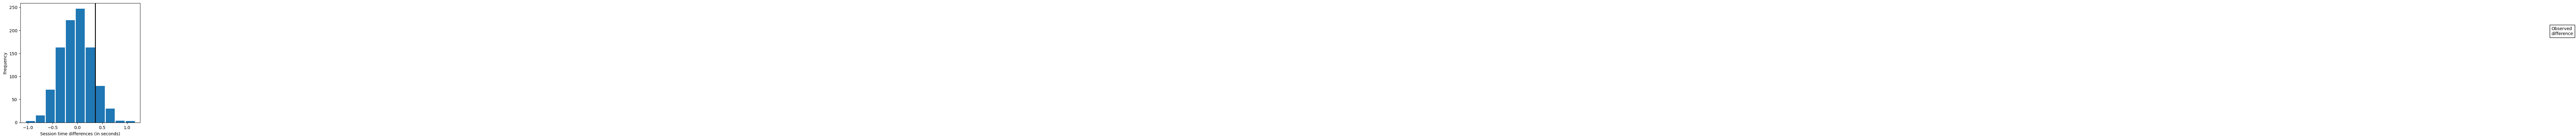

In [2]:
# 순열검정
# perm_fun : 비복원추출 방식으로 nb개의 표본을 추출후 그룹b에 할당, 나머지는 a할당
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

# 세션 시간의 차이를 히스토그램으로 표시
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5,5))
ax.hist(perm_diffs, bins = 11, rwidth = 0.9)
ax.axvline(x = mean_b - mean_a, color = 'black', lw = 2)
ax.text(50, 190, 'Observed\ndifference', bbox = {'facecolor' : 'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency') 

# 발생확률 # 난수를 사용하여 시뮬레이션의 결과가 달라질 수 있음 -> 13.4%
np.mean(np.array(perm_diffs) > mean_b - mean_a)

## 통계적 유의성과 P값 p. 128

Observed difference: 0.0368%


C:\Users\User\AppData\Local\Temp\ipykernel_7020\3925224477.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_7020\3925224477.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_7020\3925224477.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_7020\3925224477.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return x.loc[idx_B].mean() - x.loc[idx_A].mean()
C:\Users\User\AppData\Local\Temp\ipykernel_7020\3925224477.py:7: FutureWarning: Pass

Text(0, 0.5, 'Frequency')

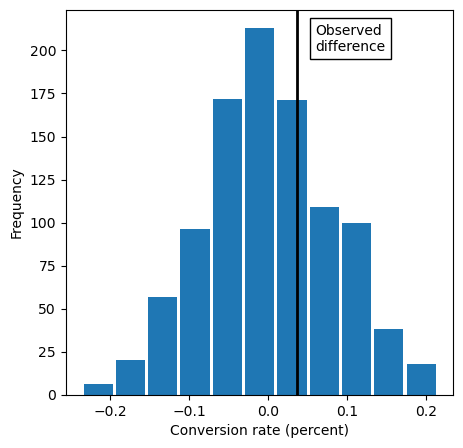

In [3]:

#무작위로 순열 추출한 전환율 차이에 대한 히스토그램
obs_pct_diff = 100 * (200 /  23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588)
              for _ in range(1000)]

fig, ax = plt.subplots(figsize = (5,5))
ax.hist(perm_diffs, bins = 11, rwidth = 0.9)
ax.axvline(x = obs_pct_diff, color = 'black', lw = 2)
ax.text(0.06, 200, 'Observed\ndifference', bbox = {'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

## p값, t 검정 p. 130, 135

In [4]:
import numpy as np
from scipy import stats     # 통계 분석을 위한 scipy 모듈의 stats 서브모듈

# p 값
survivors = np.array([[200, 23739 -200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)        # 카이제곱 독립성 검정 실행 및 결과 반환

print(f'p-value for single sided test: {p_value / 2:.4f}')      # p-value를 2로 나누어 양측 검정 대신 한 쪽 검정 결과로 출력


# t.test
# stats.ttest_ind() 함수를 사용하여 독립표본 t-검정을 실행하고 결과를 res 변수에 저장
# res는 Ttest_indResult 객체이며, 그 안에 t-통계량과 p-값이 포함
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time,      
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)

# p-값을 출력. 이때 p-값을 양측 검정이 아닌 한 쪽 검정 결과로 출력하기 위해 2로 나누어 출력
print(f'p-value for single sided test: {res.pvalue / 2:.4f}') 

p-value for single sided test: 0.3498
p-value for single sided test: 0.1408


## 분산분석 p. 144

In [5]:
# 순열검정
four_sessions = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/web_page_data.csv")

observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)

def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var()[0]

perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))


Observed means: [1.26333333 1.62      ]
Variance: 0.06360555555555555
Pr(Prob) 0.26266666666666666


## F 통계량 p. 145

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols('Time ~ Page', data = four_sessions).fit()

aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,1.0,1.113097,1.113097,1.262711,0.26901
Residual,34.0,29.971467,0.881514,NaN,NaN


## 카이제곱검정 : 재표본추출방법 p. 150

In [17]:
# Table 3-4
click_rate = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/click_rates.csv")
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')
print(clicks)

Headline  Headline A  Headline B  Headline C
Click                                       
Click             14           8          12
No-click         986         992         988


In [20]:
# Table 3-5
row_average = clicks.mean(axis=1)
pd.DataFrame({
    'Headline A': row_average,
    'Headline B': row_average,
    'Headline C': row_average,
})

,Headline A,Headline B,Headline C
Click,,,
Click,11.333333,11.333333,11.333333
No-click,988.666667,988.666667,988.666667


In [22]:
# Resampling approach
box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect
                                  for observe in row])
    # return sum of squares
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [expected_clicks, expected_noclicks]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
    random.shuffle(box)
    sample_clicks = [sum(box[0:1000]),
                     sum(box[1000:2000]),
                     sum(box[2000:3000])]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4675


## 카이제곱검정 : 통계적 이론 p. 152

In [25]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 1.6659
p-value: 0.4348


## 검정력과 표본크기 p. 163

In [26]:
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 116602.391


c:\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
